In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [2]:
ctc = sc.read_h5ad('/mnt/c/Users/ouyangkang/Desktop/ctc_with_anno.h5ad')

In [3]:
ctc_index = ctc.obs[ctc.obs['anno_ctc'] == 'True CTC'].index
ctc = ctc[ctc_index, :]

In [4]:
# exclude negative sample
negative_sample = ['A04086G3', 'C03427D3', 'A04230E2', 'A04230E4_16', 'A04224E3']
positive_index = ctc.obs[~ctc.obs['chip_id'].isin(negative_sample)].index
ctc = ctc[positive_index, :]

In [5]:
sc.pp.neighbors(ctc, use_rep='X_scVI')
sc.tl.leiden(ctc, flavor='igraph', n_iterations=-1)

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
sc.tl.umap(ctc, min_dist=0.3, spread=1.75)

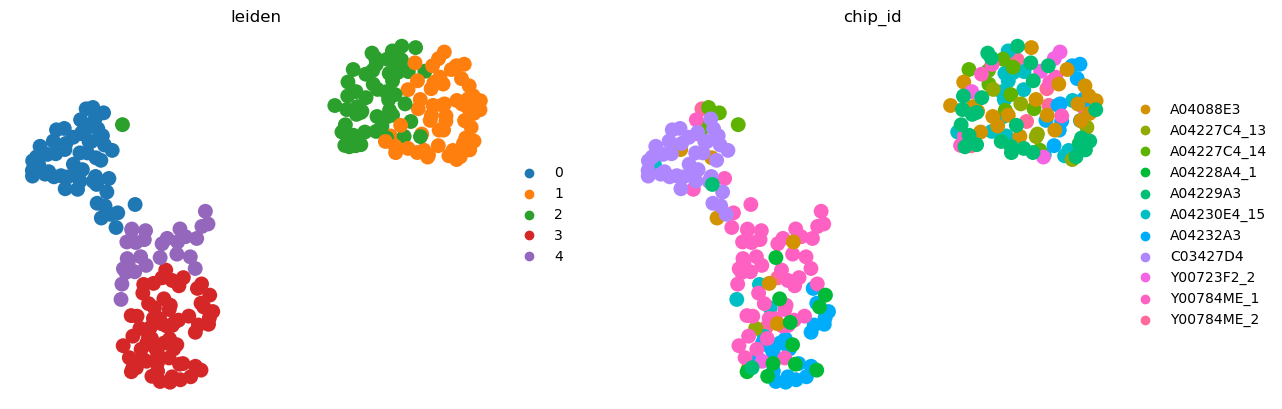

In [8]:
sc.pl.umap(ctc, color=["leiden", 'chip_id'], frameon=False)

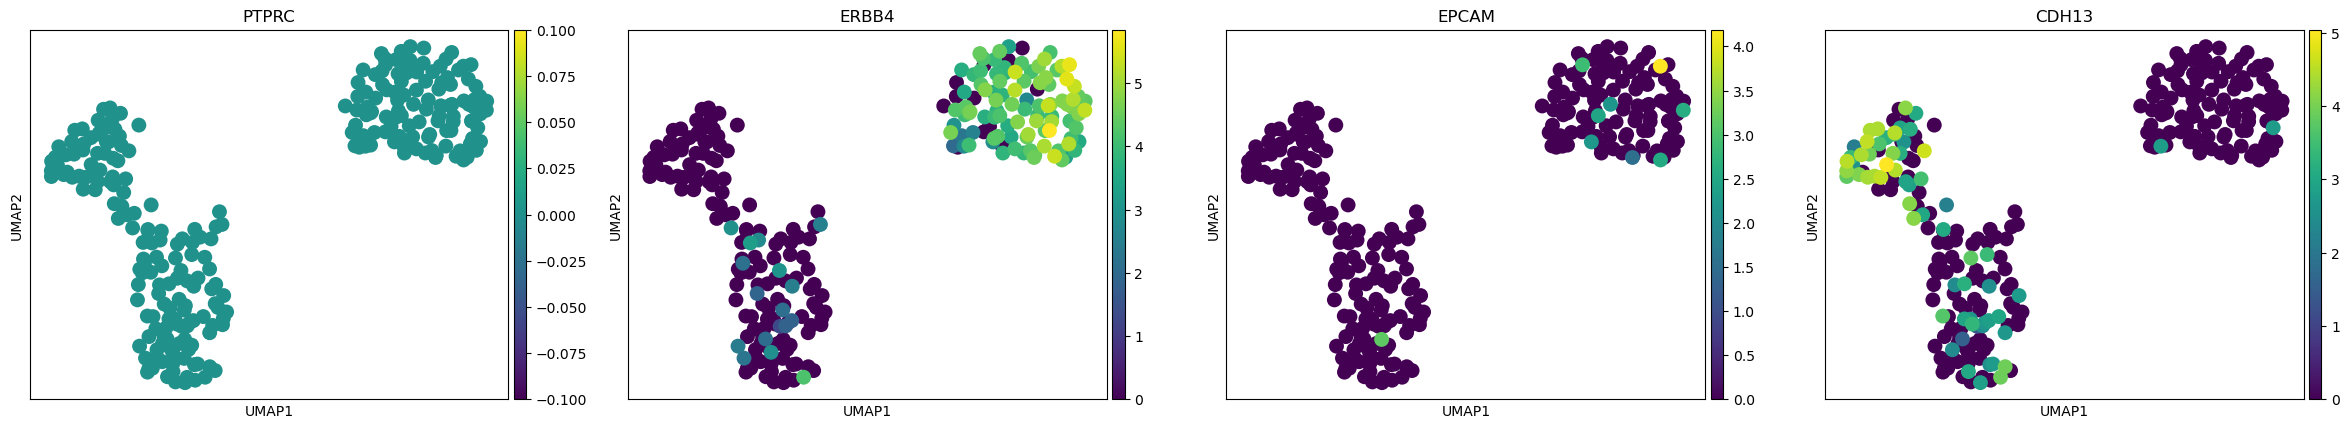

In [9]:
sc.pl.umap(ctc, color=['PTPRC', 'ERBB4', 'EPCAM', 'CDH13'], vmin='0')

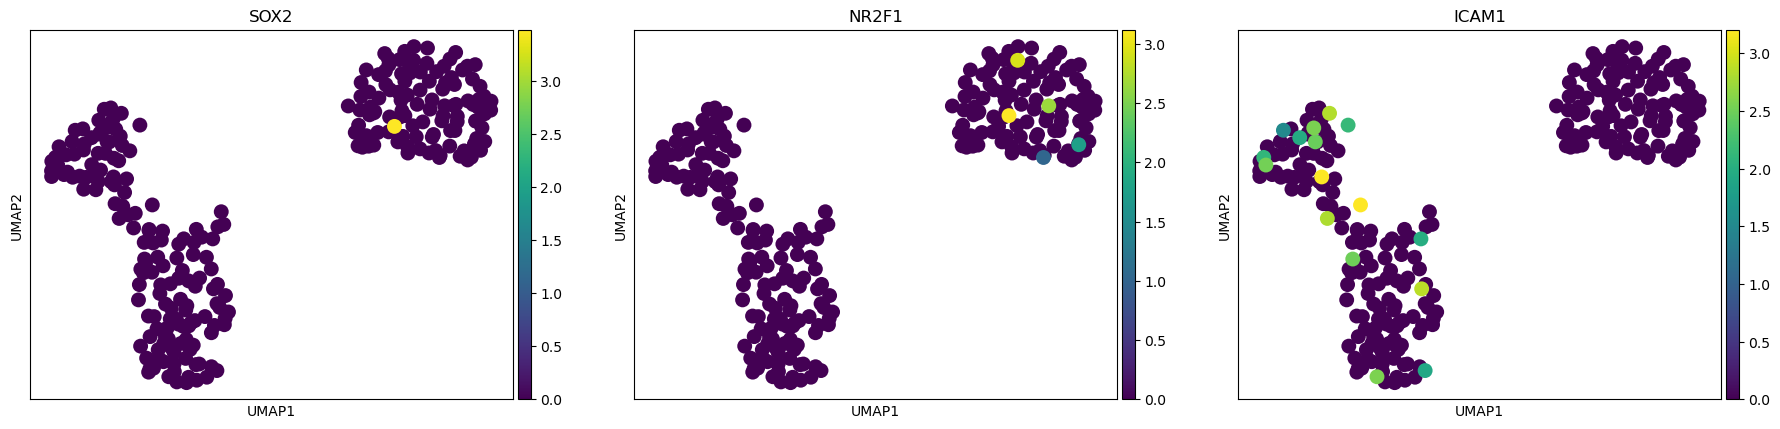

In [20]:
# csc
sc.pl.umap(ctc, color=['SOX2', 'NR2F1', 'ICAM1'], vmin=0)

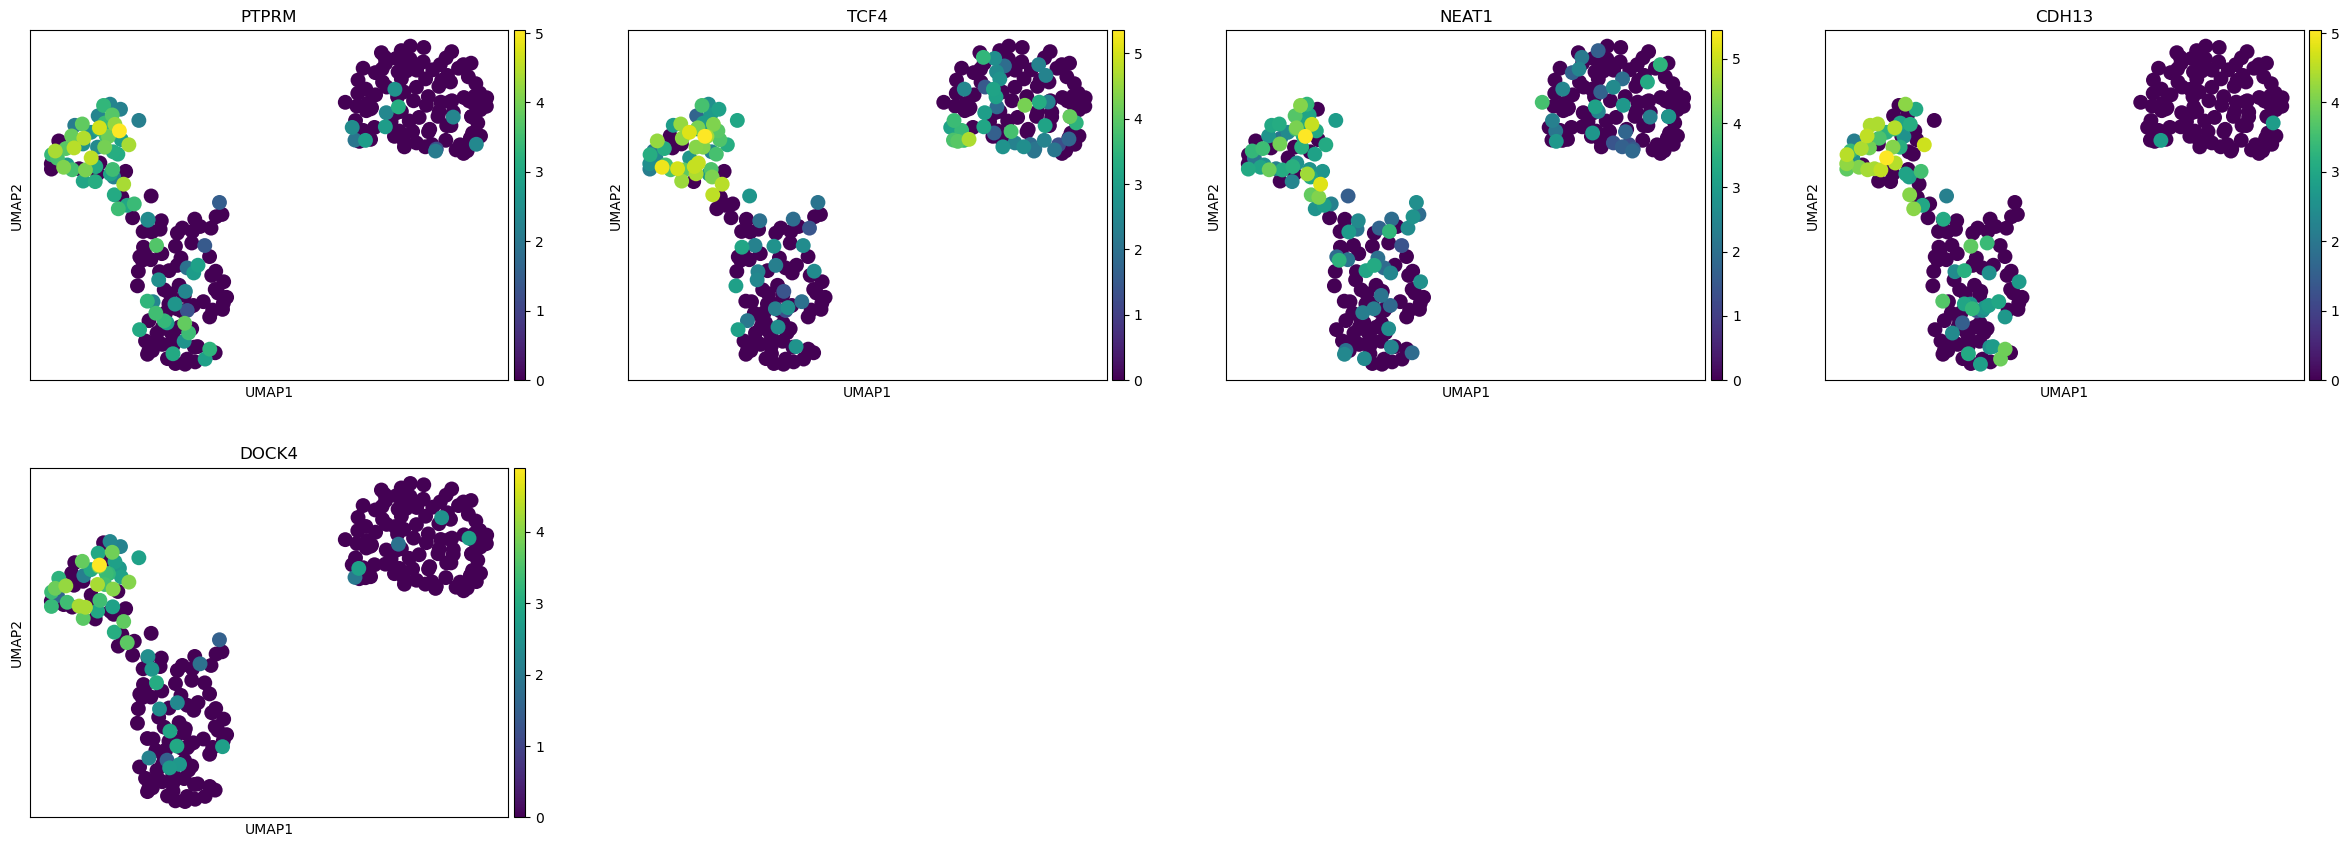

In [28]:
sc.pl.umap(ctc, color=['PTPRM', 'TCF4', 'NEAT1', 'CDH13', 'DOCK4'], vmin='0')

In [59]:
cell_cycle_genes = pd.read_csv('/mnt/c/Users/ouyangkang/Desktop/cell_cycle.csv')
# cell_cycle_genes.head()
s_gene = cell_cycle_genes[cell_cycle_genes.columns[0]][:43] 
g2m_gene = cell_cycle_genes[cell_cycle_genes.columns[0]][43:]

s_gene = [i for i in s_gene if i in ctc.var_names]
g2m_gene = [i for i in g2m_gene if i in ctc.var_names]

sc.tl.score_genes_cell_cycle(ctc, s_genes=s_gene, g2m_genes=g2m_gene)

In [60]:
ctc.obs.head()

,total_counts,pct_counts_mt,pct_counts_rb,pct_counts_hb,n_genes,doublet_score,chip_id,patient_info,phage_info,_scvi_batch,_scvi_labels,leiden,anno,chip_color,anno_ctc,S_score,G2M_score,phase
404.0-Y00784ME_2,9445.0,2.932769,0.688195,0.0,2322,0.055901,Y00784ME_2,Patient_13,S2,0,0,0,CTC,#FF699C,True CTC,-0.069064,-0.028930,G1
516.0-Y00784ME_2,1908.0,12.631027,2.987421,0.0,828,0.055901,Y00784ME_2,Patient_13,S2,0,0,1,CTC,#FF699C,True CTC,0.064151,-0.001314,S
511.0-Y00784ME_2,862.0,15.429234,1.160093,0.0,394,0.040404,Y00784ME_2,Patient_13,S2,0,0,2,CTC,#FF699C,True CTC,0.001060,-0.050913,S
547.0-Y00784ME_2,1327.0,15.523738,0.828937,0.0,647,0.080645,Y00784ME_2,Patient_13,S2,0,0,2,CTC,#FF699C,True CTC,-0.004636,-0.074726,G1
727.0-Y00784ME_2,1132.0,11.042403,2.915194,0.0,584,0.022059,Y00784ME_2,Patient_13,S2,0,0,2,CTC,#FF699C,True CTC,0.002970,0.020995,G2M


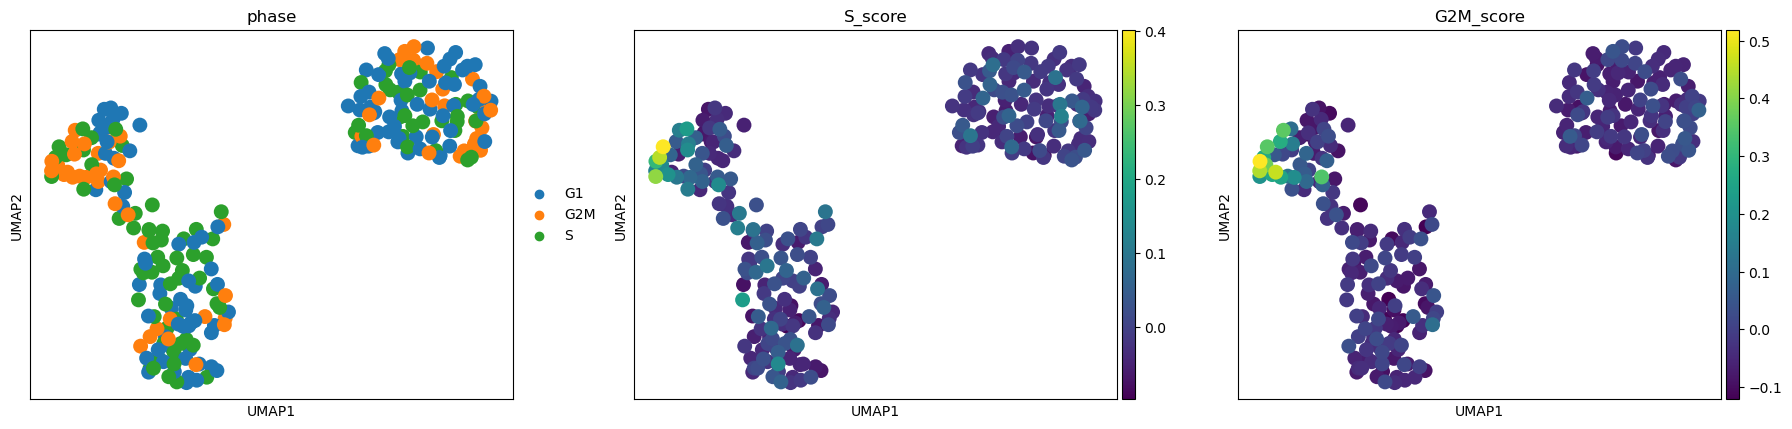

In [61]:
sc.pl.umap(ctc, color=['phase', 'S_score', 'G2M_score'])

In [66]:
dormancy_markers = ['CDKN1B', 'NR2F1', 'SOX9', 'TGFBI', 'G0S2']
sc.tl.score_genes(ctc, dormancy_markers, score_name='dormancy_score')

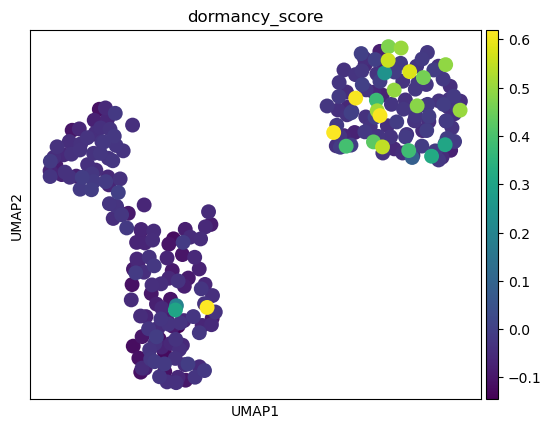

In [67]:
sc.pl.umap(ctc, color='dormancy_score')

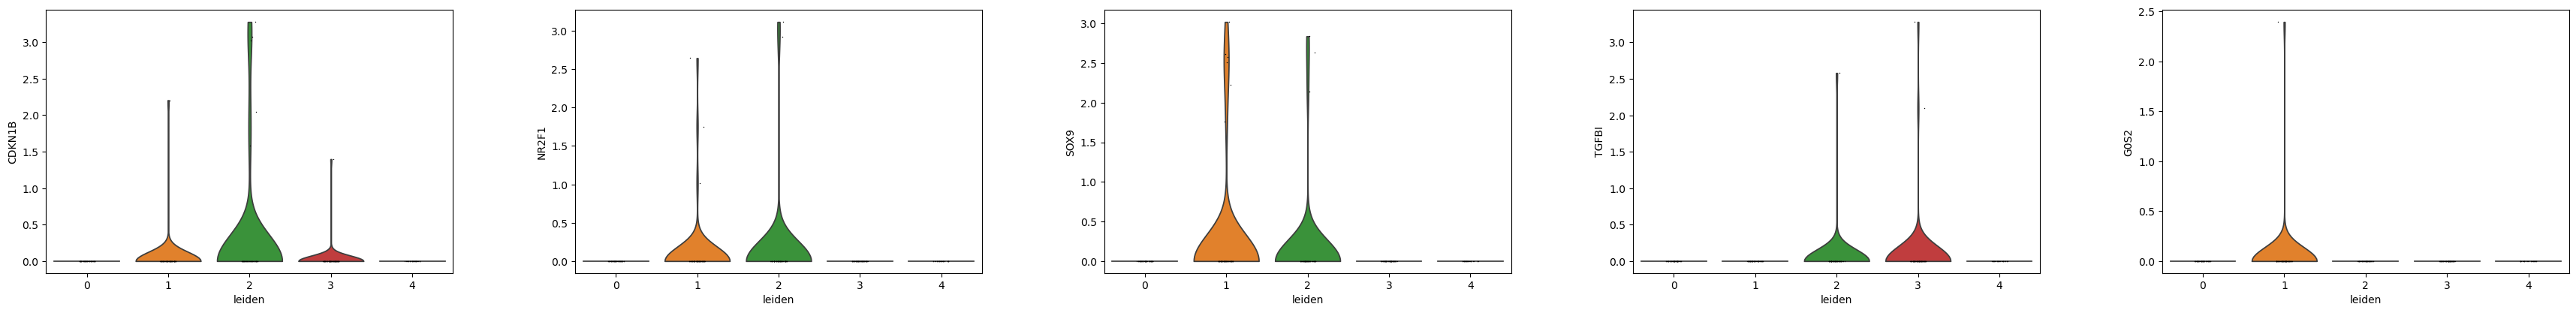

In [68]:
sc.pl.violin(ctc, keys=dormancy_markers, groupby='leiden')

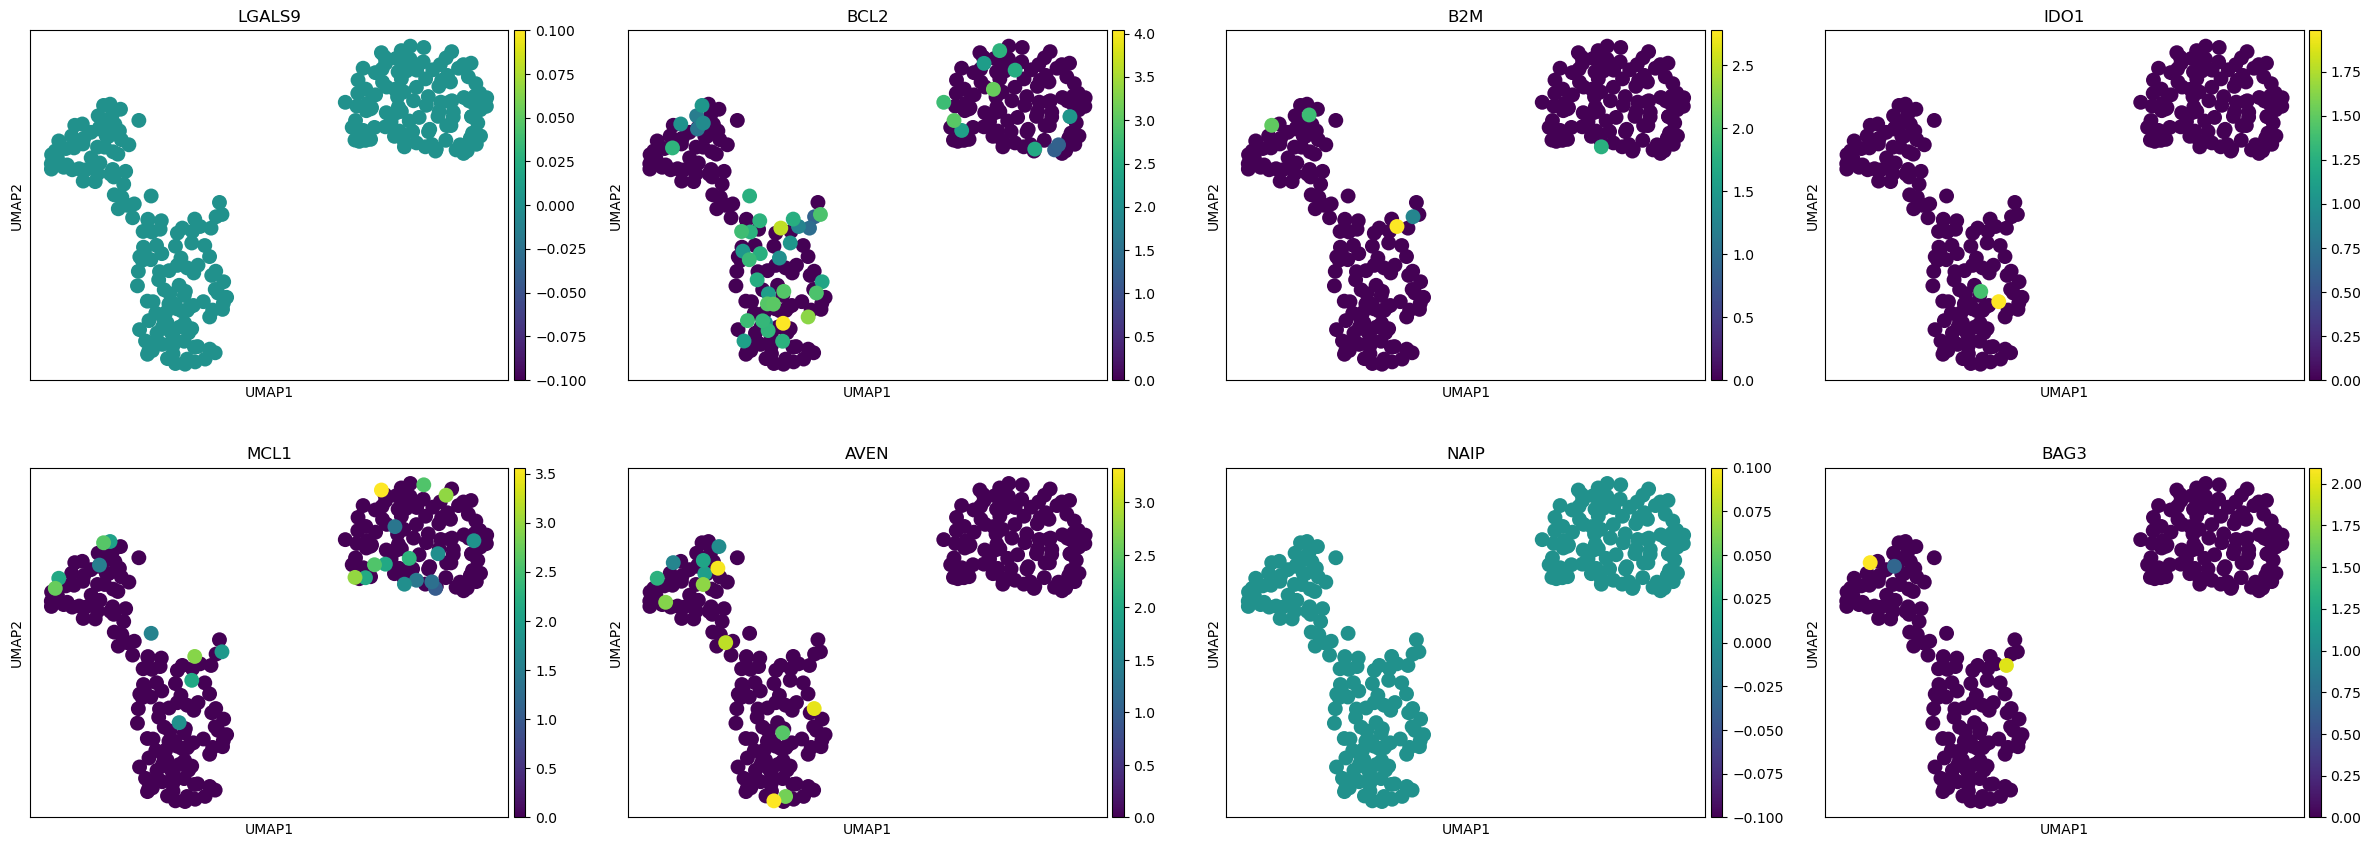

In [78]:
sc.pl.umap(ctc, color=['LGALS9', 'BCL2', 'B2M', 'IDO1', 'MCL1', 'AVEN', 'NAIP', 'BAG3'])

In [21]:
sc.tl.rank_genes_groups(ctc, groupby='leiden', method='wilcoxon')

In [24]:
result = ctc.uns['rank_genes_groups']

# 获取群体名称
groups = result['names'].dtype.names

df = pd.DataFrame()

# 提取每个群体的前200个差异基因
for group in groups:
    genes = result['names'][group][:200]  # 提取前200个基因
    df[group] = genes

In [26]:
df.to_csv('/mnt/c/Users/ouyangkang/Desktop/hvg_ctc.csv')

In [79]:
ctc.write_h5ad('ctc_heterogeneity.h5ad')

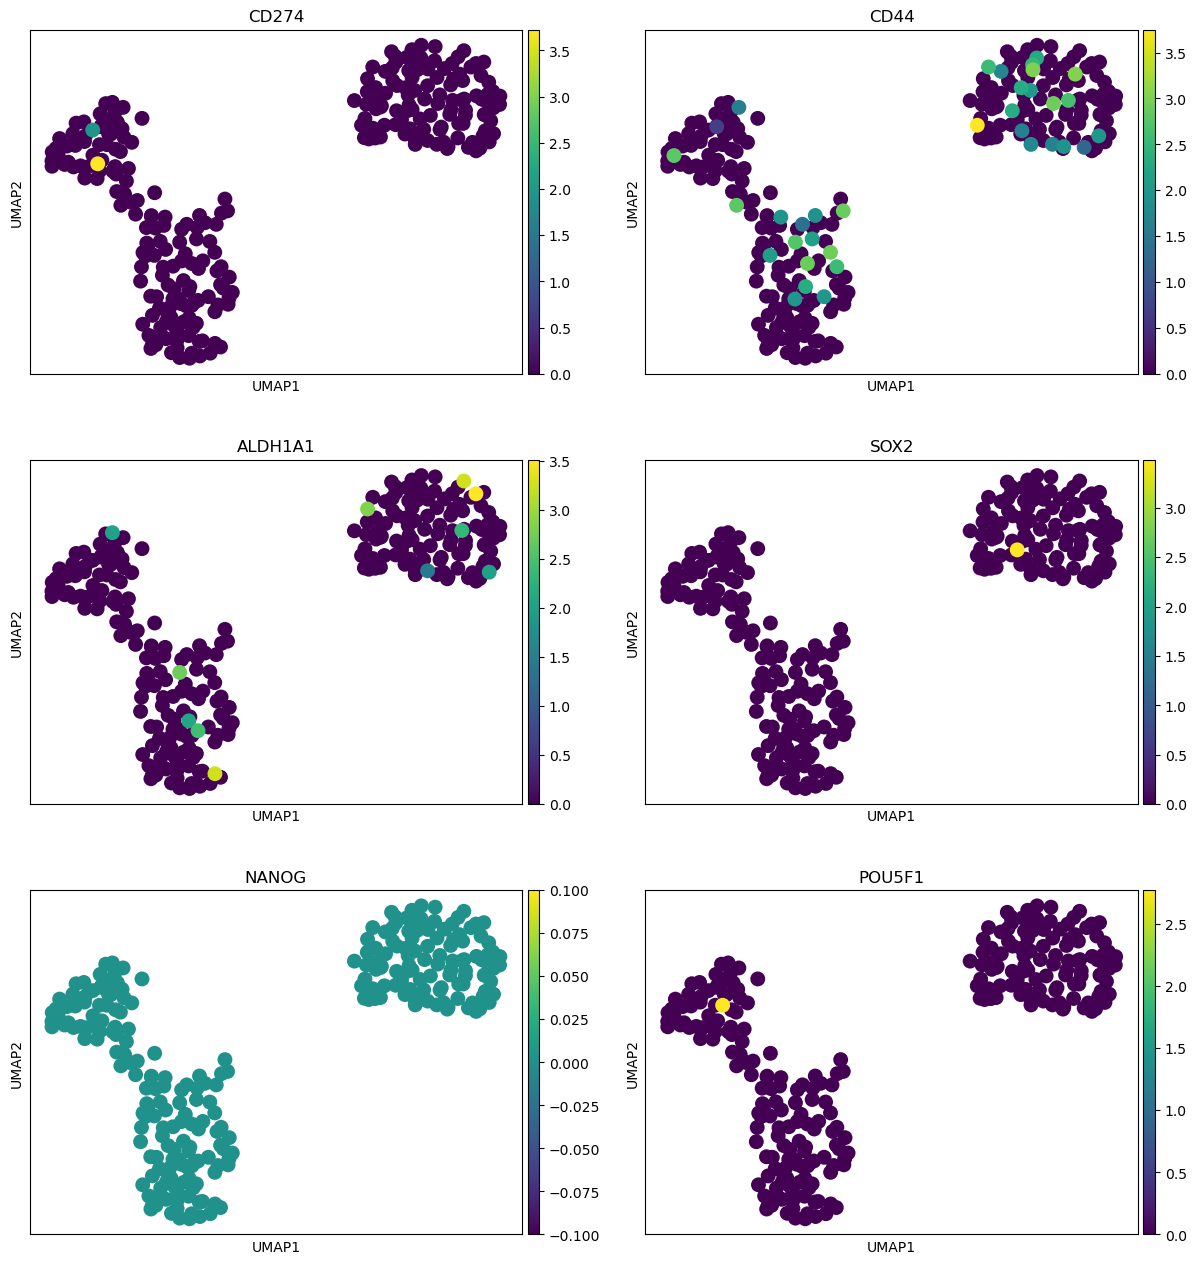

In [19]:
sc.pl.umap(ctc, color=['CD274', 'CD44', 'ALDH1A1', 'SOX2', 'NANOG', "POU5F1"], vmin='0', ncols=2)

In [ ]:
sc.pl.umap(ctc, color=['CD274', 'CD44', 'ALDH1A1', 'SOX2', 'NANOG', "POU5F1"], vmin='0', ncols=2)